In [115]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import pickle
import os
import colour

In [179]:
epoch = 300
#expdir = 'output/sawyer-reach-sim-2d/2019_05_23_11_51_43' # sawyer single goal, works!
#expdir = 'output/sawyer-reach-sim-2d/2019_05_29_14_25_52' # sawyer 5 training goals, overfits!
#expdir = 'output/point-robot/2019_05_30_12_49_06' # point mass 5 goals
#expdir = 'output/sawyer-reach-sim-2d/2019_05_30_12_33_40' # sawyer 5 goals, 2x data
#expdir = 'output/sawyer-reach-sim-2d/2019_06_03_16_16_41' # sawyer 100 goals, 2 exp trajs
#expdir = 'output/sawyer-reach-sim-2d/2019_06_03_23_29_30' # sawyer 100 goals, 10X reward scale
#expdir = 'output/point-robot/2019_06_06_16_58_20' # point robot, start at origin
#expdir = 'output/point-robot/2019_06_06_16_56_24' # point robot, circle of goals same scale as sawyer
#expdir = 'output/sawyer-reach-sim-2d/2019_06_20_11_32_47' # sawyer, goals all in one direction, reward scale 10
#expdir = 'output/sawyer-reach-sim-2d/2019_06_20_14_55_42' # sawyer, goals all in one direction, reward scale 100
#expdir = 'output/sawyer-reach-sim-2d/2019_06_20_12_23_57' # sawyer, goals all in one direction, reward scale 1000
expdir = 'output/sawyer-reach-sim-3d/2019_06_20_21_09_46' # sawyer 3D, goals all in one direction, reward scale 1000

def load_pkl(t, epoch):
    with open(os.path.join(expdir, 'eval_trajectories/task{}-epoch{}-run0.pkl'.format(t, epoch)), 'rb') as f:
        data = pickle.load(f)
    return data

def load_sim_pkl(t, epoch):
    with open(os.path.join(expdir, 'task{}_rollouts.pkl'.format(t)), 'rb') as f:
        data = pickle.load(f)
    return data

#### sample rollouts from the reacher policy

[[ 0.0279079   0.53450991  0.47659668]
 [ 0.04650833  0.55111072  0.45694861]
 [ 0.0640486   0.56735067  0.43772985]
 [ 0.06958434  0.58421741  0.41852993]
 [ 0.07382014  0.60040419  0.39934928]
 [ 0.07307302  0.61346269  0.3799358 ]
 [ 0.07222812  0.61994119  0.36036597]
 [ 0.07826683  0.6357564   0.34093291]
 [ 0.0893461   0.65244082  0.3216143 ]
 [ 0.10243512  0.66866179  0.30419701]
 [ 0.10660319  0.66914286  0.29772248]
 [ 0.10936407  0.66567389  0.29636304]
 [ 0.11230028  0.66472222  0.2944732 ]
 [ 0.11459584  0.66377566  0.29339103]]
goal [ 0.12912859  0.65799307  0.30326647]


TypeError: object of type 'numpy.float64' has no len()

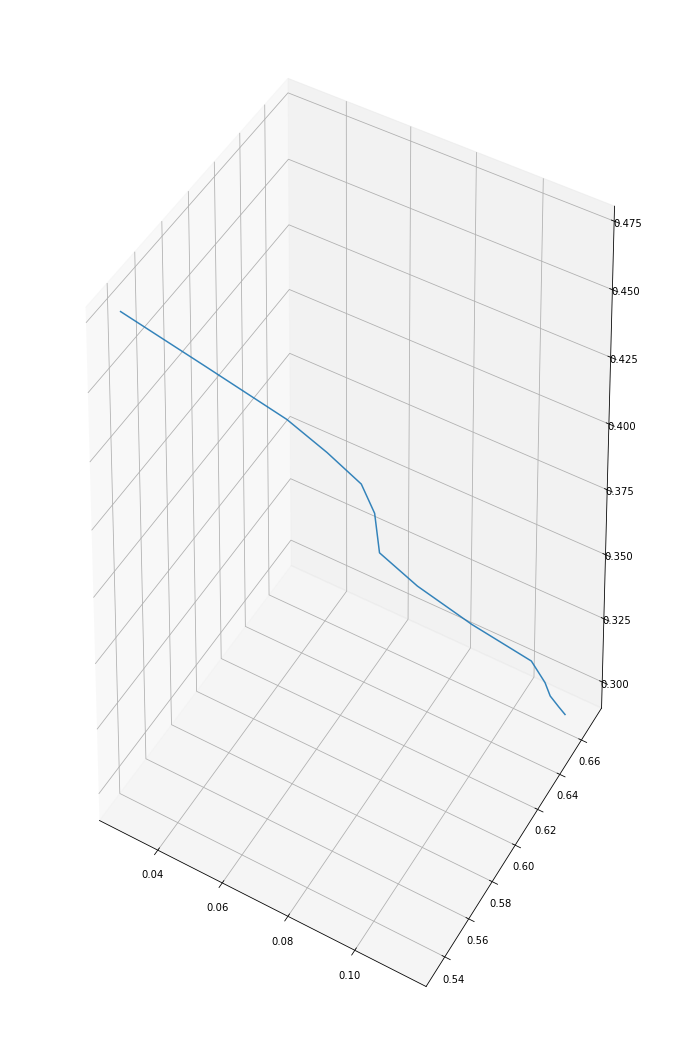

In [193]:
tasks = list(range(80, 100)) # If only 1 task, set to [0]
cmap = plt.get_cmap("tab20")
fig, axes = plt.subplots(1, 1, figsize=(12, 20))
#axes.set_xlim([-1.25, 1.25])
#axes.set_ylim([-1.25, 1.25])
#colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i,t in enumerate(tasks):
    all_paths = load_pkl(t, epoch)
    alphas = [0.2, 0.5, 0.9]
    for p,a in zip(all_paths[-1:], alphas[-1:]):
        states = p['observations'][1:][:,:]
        #print(states)
        #break
        acts = p['actions']
        rewards = p['rewards']
        axes.plot(states[:, 0], states[:, 1], '-', alpha=a, color=cmap(i))
        axes.plot(states[-1, 0], states[-1, 1], '-x', markersize=10, color=cmap(i))
        axes.set(aspect='equal')
    g = all_paths[0]['goal']
    print('goal', g)
    axes.plot(g[0], g[1], '*', markersize=10, color=cmap(i))
    #axes.plot(0, 0, 'o', markersize=10, color='black')


#### Same thing but in 3D

goal [ 0.12912859  0.65799307  0.30326647]
goal [ 0.0963984   0.74257056  0.37259347]
goal [ 0.09434934  0.70611229  0.22846961]
goal [ 0.07457793  0.6217141   0.49950819]
goal [ 0.09730549  0.5800847   0.32088394]
goal [ 0.11995498  0.57919332  0.25019231]
goal [ 0.12834983  0.69071382  0.27135185]
goal [ 0.12203817  0.70319626  0.34370414]
goal [ 0.12681838  0.69031004  0.47229931]
goal [ 0.08237039  0.59851816  0.49268614]
goal [ 0.07526377  0.63517169  0.38449933]
goal [ 0.14647945  0.55504382  0.46312035]
goal [ 0.13680885  0.58454323  0.29034295]
goal [ 0.0925203   0.66750281  0.26619638]
goal [ 0.07750286  0.68614428  0.42911071]
goal [ 0.10473541  0.560767    0.3173704 ]
goal [ 0.14969021  0.73970394  0.47939309]
goal [ 0.10668837  0.5593627   0.26132204]
goal [ 0.09054257  0.64265644  0.40183443]
goal [ 0.11560562  0.65946826  0.25272561]


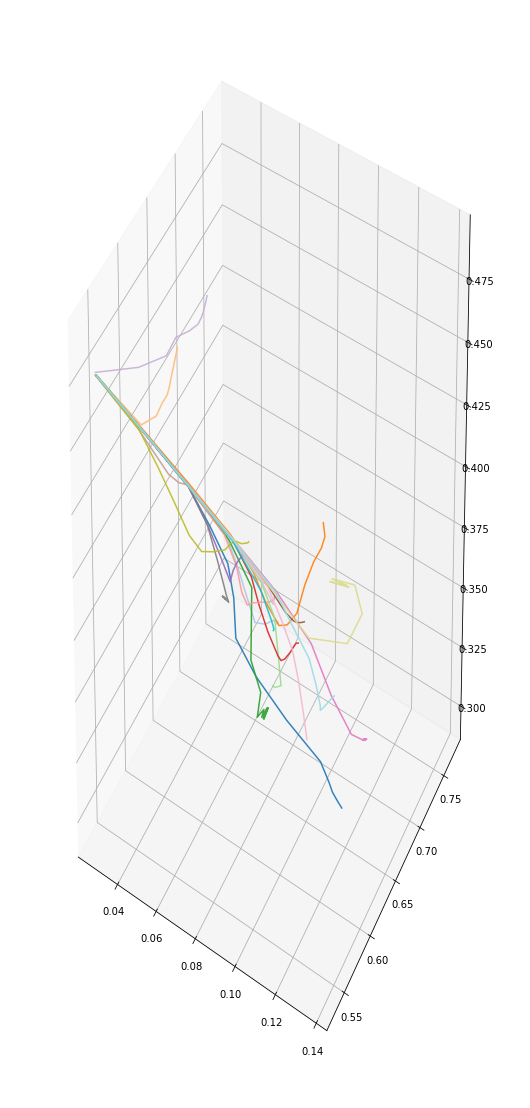

In [195]:
from mpl_toolkits import mplot3d

tasks = list(range(80, 100)) # If only 1 task, set to [0]
cmap = plt.get_cmap("tab20")
fig = plt.figure(figsize=(12, 20))
axes = plt.axes(projection='3d')
#fig, axes = plt.subplots(1, 1, figsize=(12, 20))
#axes.set_xlim([-1.25, 1.25])
#axes.set_ylim([-1.25, 1.25])
#colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i,t in enumerate(tasks):
    all_paths = load_pkl(t, epoch)
    alphas = [0.2, 0.5, 0.9]
    for p,a in zip(all_paths[-1:], alphas[-1:]):
        states = p['observations'][1:]
        acts = p['actions']
        rewards = p['rewards']
        axes.plot(states[:, 0], states[:, 1], states[:, 2], '-', alpha=a, color=cmap(i))
        #axes.plot(states[-1, 0], states[-1, 1], states[-1, 2], '-x', markersize=10, color=cmap(i))
        axes.set(aspect='equal')
    g = all_paths[0]['goal']
    print('goal', g)
    #axes.plot(g[0], g[1], g[2], '*', markersize=10, color=cmap(i))
    #axes.plot(0, 0, 'o', markersize=10, color='black')
